In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
link= pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

In [3]:
df= pd.DataFrame(link)

In [4]:
df.shape

(150, 5)

In [5]:
df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [6]:
df.rename({"variety": "Species"}, axis= 1, inplace= True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
#Preprocessing

features= df.columns[1:-1].to_list()

In [10]:
features

['sepal.width', 'petal.length', 'petal.width']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
train_val_df, test_df = train_test_split(df, test_size= 0.2, random_state= 42)
train_df, val_df= train_test_split(train_val_df, test_size= 0.25, random_state= 42)

In [13]:
input_cols= df.columns[1:-1].to_list()
target_col= df.columns[-1]

In [14]:
#input_cols,
target_col

'Species'

In [15]:
train_inputs= train_df[input_cols].copy()
train_target= train_df[target_col].copy()

val_input= val_df[input_cols].copy()
val_target= val_df[target_col].copy()

test_input= test_df[input_cols].copy()
test_target= test_df[target_col].copy()

In [16]:
print('train_inputs: ', train_inputs.shape)

train_inputs:  (90, 3)


In [17]:
train_df.shape

(90, 5)

In [18]:
df['Species'].value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: Species, dtype: int64

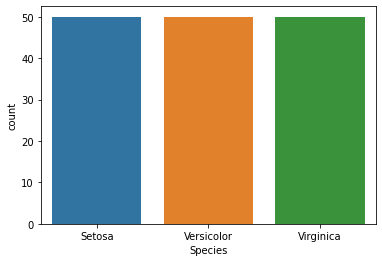

In [19]:
sns.countplot(x= 'Species', data= df)
plt.show()

<AxesSubplot:>

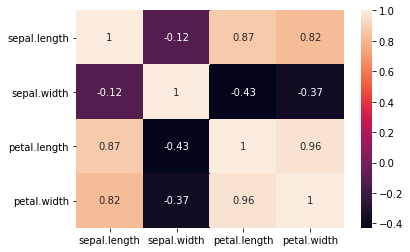

In [20]:
sns.heatmap(df.corr(), annot= True)

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
model= DecisionTreeClassifier()

In [23]:
model.fit(train_inputs, train_target)

DecisionTreeClassifier()

In [24]:
val_pred= model.predict(val_input)

In [25]:
val_pred

array(['Versicolor', 'Versicolor', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Virginica', 'Virginica', 'Virginica', 'Virginica',
       'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Versicolor', 'Setosa', 'Virginica', 'Setosa', 'Versicolor',
       'Setosa', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Virginica',
       'Virginica'], dtype=object)

In [26]:
model.feature_importances_

array([0.06256952, 0.39628451, 0.54114596])

In [27]:
pd.DataFrame(index= df[input_cols].columns, data= model.feature_importances_ , columns= ['Feature importances'])

,Feature importances
sepal.width,0.062570
petal.length,0.396285
petal.width,0.541146


In [28]:
pd.DataFrame(index= train_inputs.columns, data= model.feature_importances_ , columns= ['Feature importances'])

,Feature importances
sepal.width,0.062570
petal.length,0.396285
petal.width,0.541146


In [29]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [30]:
print(classification_report(val_target, val_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00         9
  Versicolor       0.92      0.85      0.88        13
   Virginica       0.78      0.88      0.82         8

    accuracy                           0.90        30
   macro avg       0.90      0.91      0.90        30
weighted avg       0.90      0.90      0.90        30



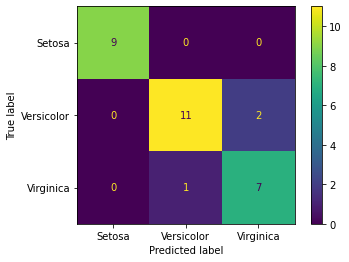

In [31]:
plot_confusion_matrix(model, val_input, val_target)

In [32]:
from sklearn.tree import plot_tree

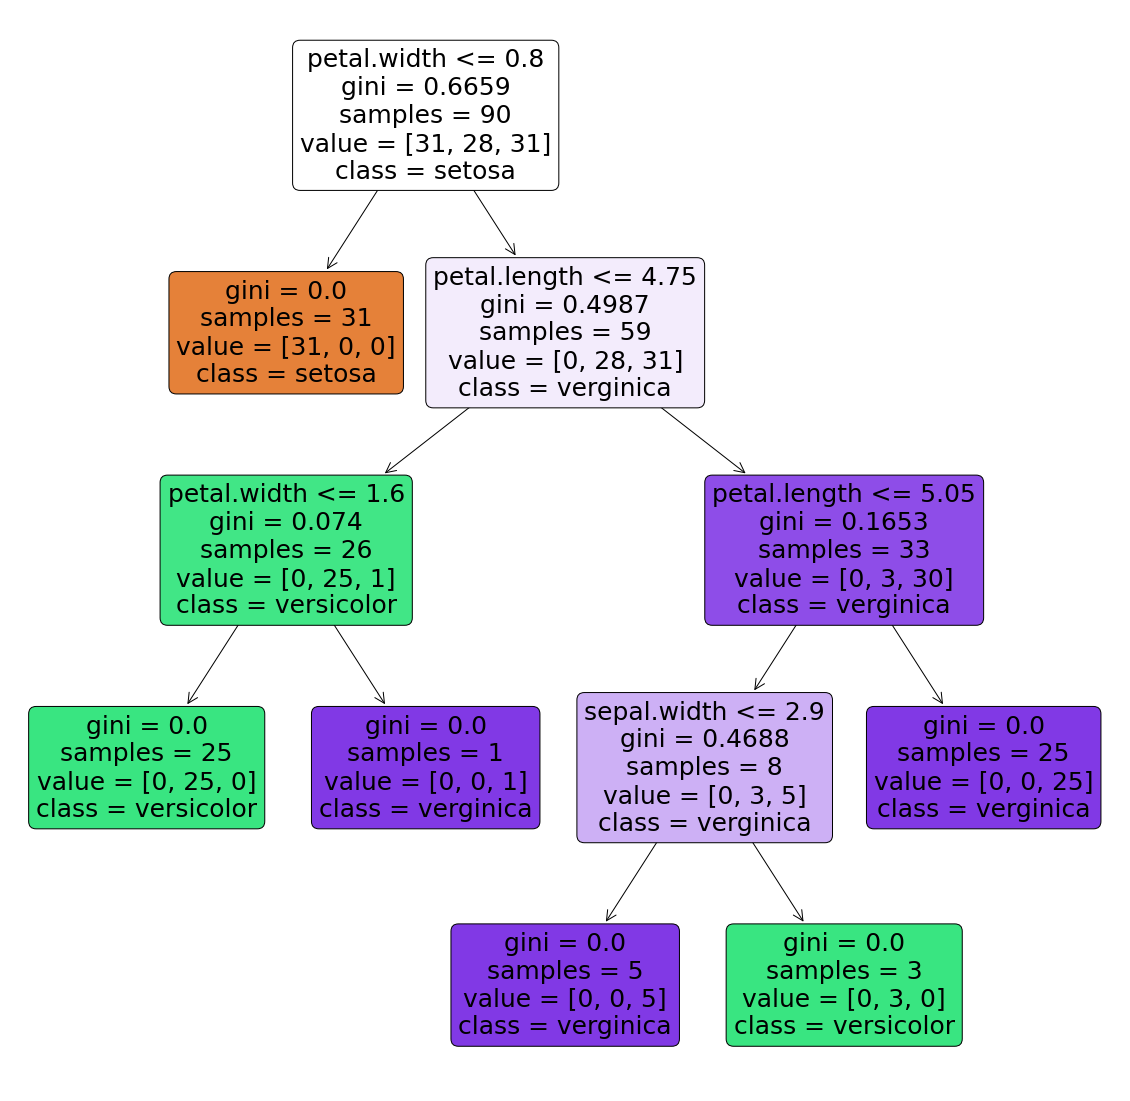

In [33]:
plt.figure(figsize= (20,20))
plot_tree(model, feature_names= train_df[input_cols].columns,\
          class_names= ['setosa', 'versicolor', 'verginica'],\
          filled= True, precision= 4, rounded= True)
plt.show()